<a href="https://colab.research.google.com/github/Onome1991/Cartypes-FE-CO2Emmision/blob/main/Cartype_FE_CO2emmision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Python Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.preprocessing import StandardScaler

# Libraries for data visulisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotnine import *
import plotly.graph_objects as go
import folium
from shapely.geometry import Point
from shapely import wkt
#Libraries of debugging
import warnings


warnings.filterwarnings('ignore')
sns.set(color_codes = True)
sns.set_palette(palette = 'magma', n_colors = 8)

warnings.filterwarnings('ignore')
sns.set(color_codes = True)
sns.set_palette(palette = 'magma', n_colors = 8)

Importing Data

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving cartype.xls to cartype.xls


In [ ]:
import io
data = pd.read_excel(io.BytesIO(uploaded['cartype.xls']))

In [ ]:
data


,Model Year,Mfr Name,Division,Carline,Engine Displacement,# Cylinders,Transmission,City FE,Highway FE,Combined FE,Air Aspiration Method,Transmission Description,# Gears,Drive Desc,Carline Class Desc,Release Date,City CO2,Highway CO2,Combined CO2
0,2015,aston martin,Aston Martin Lagonda Ltd,V12 Vantage S,6.0,12,Auto,12,18,14,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,2014-01-20,742,488,628
1,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,4.7,8,Auto,14,21,16,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,655,426,552
2,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,4.7,8,Manual,13,19,15,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,681,461,582
3,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage S,4.7,8,Auto,14,21,16,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,655,426,552
4,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage S,4.7,8,Manual,13,19,15,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,681,461,582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,2015,Mercedes-Benz,Mercedes-Benz,GL 550 4MATIC,4.7,8,Auto,13,18,15,Turbocharged,Automatic,7,4-Wheel Drive,Standard SUV 4WD,2014-07-15,660,498,587
725,2015,Mercedes-Benz,Mercedes-Benz,ML 350 4MATIC,3.5,6,Auto,17,22,19,Naturally Aspirated,Automatic,7,4-Wheel Drive,Standard SUV 4WD,2014-07-15,506,396,456
726,2015,Mercedes-Benz,Mercedes-Benz,ML 350 4MATIC,3.5,6,Auto,17,22,19,Naturally Aspirated,Automatic,7,4-Wheel Drive,Standard SUV 4WD,2014-07-23,506,396,456
727,2015,Mercedes-Benz,Mercedes-Benz,ML 400 4MATIC,3.0,6,Auto,18,22,20,Turbocharged,Automatic,7,4-Wheel Drive,Standard SUV 4WD,2014-07-04,496,403,454


Data SKimming

In [ ]:
data.columns

Index(['Model Year', 'Mfr Name', 'Division', 'Carline', 'Engine Displacement',
       '# Cylinders', 'Transmission', 'City FE', 'Highway FE', 'Combined FE',
       'Air Aspiration Method', 'Transmission Description', '# Gears',
       'Drive Desc', 'Carline Class Desc', 'Release Date', 'City CO2',
       'Highway CO2', 'Combined CO2'],
      dtype='object')

In [ ]:
data.dtypes

Model Year                          object
Mfr Name                            object
Division                            object
Carline                             object
Engine Displacement                float64
# Cylinders                          int64
Transmission                        object
City FE                              int64
Highway FE                           int64
Combined FE                          int64
Air Aspiration Method               object
Transmission Description            object
# Gears                              int64
Drive Desc                          object
Carline Class Desc                  object
Release Date                datetime64[ns]
City CO2                             int64
Highway CO2                          int64
Combined CO2                         int64
dtype: object

In [ ]:
data.head(10)

,Model Year,Mfr Name,Division,Carline,Engine Displacement,# Cylinders,Transmission,City FE,Highway FE,Combined FE,Air Aspiration Method,Transmission Description,# Gears,Drive Desc,Carline Class Desc,Release Date,City CO2,Highway CO2,Combined CO2
0,2015,aston martin,Aston Martin Lagonda Ltd,V12 Vantage S,6.0,12,Auto,12,18,14,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,2014-01-20,742,488,628
1,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,4.7,8,Auto,14,21,16,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,655,426,552
2,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,4.7,8,Manual,13,19,15,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,681,461,582
3,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage S,4.7,8,Auto,14,21,16,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,655,426,552
4,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage S,4.7,8,Manual,13,19,15,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,681,461,582
5,2015,aston martin,Aston Martin Lagonda Ltd,Vantage GT,4.7,8,Auto,14,21,16,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,655,426,552
6,2015,aston martin,Aston Martin Lagonda Ltd,Vantage GT,4.7,8,Manual,13,19,15,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,681,461,582
7,2015,Volkswagen Group of,Audi,R8,4.2,8,Auto,14,23,17,Naturally Aspirated,Automated Manual- Selectable (e.g. Automated M...,7,All Wheel Drive,Two Seaters,2014-06-09,656,394,538
8,2015,Volkswagen Group of,Audi,R8,4.2,8,Manual,11,20,14,Naturally Aspirated,Manual,6,All Wheel Drive,Two Seaters,2014-06-09,772,439,622
9,2015,Volkswagen Group of,Audi,R8,5.2,10,Auto,13,22,16,Naturally Aspirated,Automated Manual- Selectable (e.g. Automated M...,7,All Wheel Drive,Two Seaters,2014-06-09,686,400,557


Data Cleaning

In [ ]:
data.isnull().sum()

Model Year                  0
Mfr Name                    0
Division                    0
Carline                     0
Engine Displacement         0
# Cylinders                 0
Transmission                0
City FE                     0
Highway FE                  0
Combined FE                 0
Air Aspiration Method       0
Transmission Description    0
# Gears                     0
Drive Desc                  0
Carline Class Desc          0
Release Date                0
City CO2                    0
Highway CO2                 0
Combined CO2                0
dtype: int64

In [ ]:
data.duplicated().sum()

7

In [ ]:
duplicates= data.duplicated()

In [ ]:
duplicate_rows = data[duplicates]
duplicate_rows

,Model Year,Mfr Name,Division,Carline,Engine Displacement,# Cylinders,Transmission,City FE,Highway FE,Combined FE,Air Aspiration Method,Transmission Description,# Gears,Drive Desc,Carline Class Desc,Release Date,City CO2,Highway CO2,Combined CO2
537,2015,General Motors,Chevrolet,G2500 EXPRESS 2WD PASS MDPV,6.0,8,Auto,11,16,13,Naturally Aspirated,Automatic,6,"2-Wheel Drive, Rear","Vans, Passenger Type",2014-07-21,830,564,710
545,2015,General Motors,GMC,G2500 SAVANA 2WD PASS MDPV,6.0,8,Auto,11,16,13,Naturally Aspirated,Automatic,6,"2-Wheel Drive, Rear","Vans, Passenger Type",2014-07-21,830,564,710
556,2015,Chrysler Group LLC,RAM,C/V Tradesman,3.6,6,Auto,18,26,21,Naturally Aspirated,Automatic,6,"2-Wheel Drive, Front","Special Purpose Vehicle, minivan 2WD",2014-08-04,504,345,432
562,2015,General Motors,Chevrolet,EQUINOX FWD,2.4,4,Auto,22,32,26,Naturally Aspirated,Automatic,6,"2-Wheel Drive, Front",Small SUV 2WD,2014-05-30,398,278,344
567,2015,General Motors,GMC,TERRAIN FWD,2.4,4,Auto,22,32,26,Naturally Aspirated,Automatic,6,"2-Wheel Drive, Front",Small SUV 2WD,2014-05-30,398,278,344
574,2015,Chrysler Group LLC,Jeep,Cherokee FWD,2.4,4,Auto,22,31,25,Naturally Aspirated,Automatic,9,"2-Wheel Drive, Front",Small SUV 2WD,2014-07-21,414,291,359
626,2015,Chrysler Group LLC,Jeep,Cherokee 4X4,2.4,4,Auto,21,28,24,Naturally Aspirated,Automatic,9,All Wheel Drive,Small SUV 4WD,2014-07-21,426,315,376


In [ ]:
data = data.drop_duplicates()

In [ ]:
data

,Model Year,Mfr Name,Division,Carline,Engine Displacement,# Cylinders,Transmission,City FE,Highway FE,Combined FE,Air Aspiration Method,Transmission Description,# Gears,Drive Desc,Carline Class Desc,Release Date,City CO2,Highway CO2,Combined CO2
0,2015,aston martin,Aston Martin Lagonda Ltd,V12 Vantage S,6.0,12,Auto,12,18,14,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,2014-01-20,742,488,628
1,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,4.7,8,Auto,14,21,16,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,655,426,552
2,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,4.7,8,Manual,13,19,15,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,681,461,582
3,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage S,4.7,8,Auto,14,21,16,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,655,426,552
4,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage S,4.7,8,Manual,13,19,15,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,681,461,582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,2015,Mercedes-Benz,Mercedes-Benz,GL 550 4MATIC,4.7,8,Auto,13,18,15,Turbocharged,Automatic,7,4-Wheel Drive,Standard SUV 4WD,2014-07-15,660,498,587
725,2015,Mercedes-Benz,Mercedes-Benz,ML 350 4MATIC,3.5,6,Auto,17,22,19,Naturally Aspirated,Automatic,7,4-Wheel Drive,Standard SUV 4WD,2014-07-15,506,396,456
726,2015,Mercedes-Benz,Mercedes-Benz,ML 350 4MATIC,3.5,6,Auto,17,22,19,Naturally Aspirated,Automatic,7,4-Wheel Drive,Standard SUV 4WD,2014-07-23,506,396,456
727,2015,Mercedes-Benz,Mercedes-Benz,ML 400 4MATIC,3.0,6,Auto,18,22,20,Turbocharged,Automatic,7,4-Wheel Drive,Standard SUV 4WD,2014-07-04,496,403,454


Checking for Incorrect Data Entry

In [ ]:

# Flatten unique values from all columns
unique_entries = pd.Series([value for column in data.columns for value in data[column].unique()])

# Get summary of unique entries
unique_summary = unique_entries.value_counts().reset_index()
unique_summary.columns = ['Unique Entry', 'Count']


In [ ]:
unique_summary

,Unique Entry,Count
0,8.0,4
1,16,4
2,33,3
3,350,3
4,454,3
...,...,...
1090,G3500 EXPRESS 2WD PASS MDPV,1
1091,Transit T150 Wagon,1
1092,Transit T150 Wagon FFV,1
1093,G2500 SAVANA 2WD PASS MDPV,1


In [ ]:
data.dtypes

Model Year                          object
Mfr Name                            object
Division                            object
Carline                             object
Engine Displacement                float64
# Cylinders                          int64
Transmission                        object
City FE                              int64
Highway FE                           int64
Combined FE                          int64
Air Aspiration Method               object
Transmission Description            object
# Gears                              int64
Drive Desc                          object
Carline Class Desc                  object
Release Date                datetime64[ns]
City CO2                             int64
Highway CO2                          int64
Combined CO2                         int64
dtype: object

In [ ]:
data['Carline Class Desc'].value_counts()

Compact Cars                            142
Midsize Cars                            114
Large Cars                               73
Two Seaters                              71
Small SUV 4WD                            70
Subcompact Cars                          60
Minicompact Cars                         43
Small SUV 2WD                            43
Standard SUV 4WD                         33
Standard SUV 2WD                         22
Small Station Wagons                     18
Vans, Passenger Type                     12
Special Purpose Vehicle, minivan 2WD      5
Small Pick-up Trucks 4WD                  4
Vans, Cargo Types                         4
Small Pick-up Trucks 2WD                  4
Special Purpose Vehicle 2WD               2
Standard Pick-up Trucks 4WD               2
Name: Carline Class Desc, dtype: int64

In [ ]:
data['Transmission Description'].value_counts()

Semi-Automatic                                                       293
Automatic                                                            159
Manual                                                               149
Automated Manual- Selectable (e.g. Automated Manual with paddles)     73
Selectable Continuously Variable (e.g. CVT with paddles)              20
Automated Manual                                                      17
Continuously Variable                                                 11
Name: Transmission Description, dtype: int64

In [ ]:
data['Drive Desc'].value_counts()

2-Wheel Drive, Front       249
2-Wheel Drive, Rear        205
All Wheel Drive            197
4-Wheel Drive               66
Part-time 4-Wheel Drive      4
d                            1
Name: Drive Desc, dtype: int64

In [ ]:
desired_value = 'd'
matching_row = data[data['Drive Desc'] == desired_value].iloc[0]

In [ ]:
matching_row

Model Year                                 2015
Mfr Name                                Porsche
Division                                Porsche
Carline                             Boxster GTS
Engine Displacement                         3.4
# Cylinders                                   6
Transmission                             Manual
City FE                                      19
Highway FE                                   26
Combined FE                                  22
Air Aspiration Method       Naturally Aspirated
Transmission Description                 Manual
# Gears                                       6
Drive Desc                                    d
Carline Class Desc                  Two Seaters
Release Date                2014-06-23 00:00:00
City CO2                                    458
Highway CO2                                 334
Combined CO2                                402
Name: 62, dtype: object

In [ ]:
condition_transmission = data['Transmission'] == 'Manual'
condition_Carline_Class_Desc = data['Carline Class Desc'] =='Two Seaters'
rows_match = condition_transmission & condition_Carline_Class_Desc

In [ ]:
matching_rows = data[rows_match]

In [ ]:
matching_rows

,Model Year,Mfr Name,Division,Carline,Engine Displacement,# Cylinders,Transmission,City FE,Highway FE,Combined FE,Air Aspiration Method,Transmission Description,# Gears,Drive Desc,Carline Class Desc,Release Date,City CO2,Highway CO2,Combined CO2
2,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,4.7,8,Manual,13,19,15,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,681,461,582
4,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage S,4.7,8,Manual,13,19,15,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,681,461,582
6,2015,aston martin,Aston Martin Lagonda Ltd,Vantage GT,4.7,8,Manual,13,19,15,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,681,461,582
8,2015,Volkswagen Group of,Audi,R8,4.2,8,Manual,11,20,14,Naturally Aspirated,Manual,6,All Wheel Drive,Two Seaters,2014-06-09,772,439,622
10,2015,Volkswagen Group of,Audi,R8,5.2,10,Manual,12,19,14,Naturally Aspirated,Manual,6,All Wheel Drive,Two Seaters,2014-06-09,753,454,618
12,2015,Volkswagen Group of,Audi,R8 Spyder,4.2,8,Manual,11,20,14,Naturally Aspirated,Manual,6,All Wheel Drive,Two Seaters,2014-06-09,772,439,622
14,2015,Volkswagen Group of,Audi,R8 Spyder,5.2,10,Manual,12,19,14,Naturally Aspirated,Manual,6,All Wheel Drive,Two Seaters,2014-06-09,753,454,618
17,2015,BMW,BMW,Z4 sDrive28i,2.0,4,Manual,22,34,26,Turbocharged,Manual,6,"2-Wheel Drive, Rear",Two Seaters,2014-03-26,400,259,337
19,2015,BMW,BMW,Z4 sDrive35i,3.0,6,Manual,19,26,21,Turbocharged,Manual,6,"2-Wheel Drive, Rear",Two Seaters,2014-04-01,476,340,415
22,2015,General Motors,Chevrolet,CORVETTE,6.2,8,Manual,17,29,21,Naturally Aspirated,Manual,7,"2-Wheel Drive, Rear",Two Seaters,2014-07-10,517,310,424


Replace 'd' with the 2- Wheel Drive, Rear

In [ ]:
data['Drive Desc'] = data['Drive Desc'].replace('d', '2-Wheel Drive, Rear')

In [ ]:
data['Drive Desc'].value_counts()

2-Wheel Drive, Front       249
2-Wheel Drive, Rear        206
All Wheel Drive            197
4-Wheel Drive               66
Part-time 4-Wheel Drive      4
Name: Drive Desc, dtype: int64

In [ ]:
data['Air Aspiration Method'].value_counts()

Naturally Aspirated          406
Turbocharged                 280
Supercharged                  34
Turbocharged+Supercharged      2
Name: Air Aspiration Method, dtype: int64

In [ ]:
data['Transmission'].value_counts()

Auto      573
Manual    149
Name: Transmission, dtype: int64

In [ ]:
data['Carline'].value_counts()

CAMARO           9
Passat           5
MAZDA3 5-Door    5
Challenger       5
MAZDA3 4-Door    5
                ..
LACROSSE AWD     1
550i xDrive      1
550i             1
535i xDrive      1
Touareg          1
Name: Carline, Length: 429, dtype: int64

In [ ]:
data['Division'].value_counts()

BMW                                 85
Chevrolet                           59
Audi                                53
Porsche                             47
Mini                                34
Mercedes-Benz                       31
KIA MOTORS CORPORATION              31
Jeep                                29
Volkswagen                          29
Ford                                26
GMC                                 26
Cadillac                            24
MAZDA                               24
HYUNDAI MOTOR COMPANY               24
Volvo Cars of North America, LLC    19
Jaguar                              19
Dodge                               15
Buick                               14
Mitsubishi Motors Corporation       13
Subaru                              12
Lincoln                             11
TOYOTA                              10
NISSAN                              10
Chrysler                             9
FIAT                                 9
LEXUS                    

In [ ]:
data['# Cylinders'].value_counts()

4     313
6     247
8     137
12     12
10      5
3       4
5       3
16      1
Name: # Cylinders, dtype: int64

In [ ]:
data['Mfr Name'].value_counts()

General Motors          123
BMW                     119
Volkswagen Group of      94
Chrysler Group LLC       63
Porsche                  47
Ford Motor Company       37
Mercedes-Benz            31
Kia                      31
MAZDA                    24
Hyundai                  24
Toyota                   23
Jaguar Land Rover L      21
Volvo                    19
Nissan                   19
Honda                    14
Mitsubishi Motors Co     13
Subaru                   12
aston martin              8
Name: Mfr Name, dtype: int64

In [ ]:
data.keys()

Index(['Model Year', 'Mfr Name', 'Division', 'Carline', 'Engine Displacement',
       '# Cylinders', 'Transmission', 'City FE', 'Highway FE', 'Combined FE',
       'Air Aspiration Method', 'Transmission Description', '# Gears',
       'Drive Desc', 'Carline Class Desc', 'Release Date', 'City CO2',
       'Highway CO2', 'Combined CO2'],
      dtype='object')

Outlier Detection

<Axes: xlabel='Transmission', ylabel='Combined CO2'>

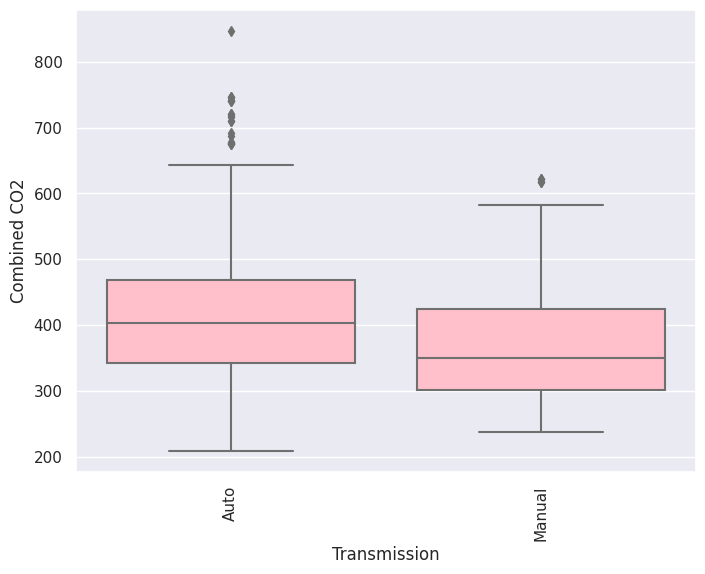

In [ ]:
# Plot the box plot
plt.figure(figsize=(8, 6))
plt.xticks(rotation=90)
sns.boxplot(data=data, x='Transmission', y='Combined CO2', color="skyblue", boxprops=dict(facecolor="pink"))

In [ ]:
Auto_outlier= data['Combined CO2']>= 630
rows_AutoCo2= data[Auto_outlier]

In [ ]:
rows_AutoCo2

,Model Year,Mfr Name,Division,Carline,Engine Displacement,# Cylinders,Transmission,City FE,Highway FE,Combined FE,Air Aspiration Method,Transmission Description,# Gears,Drive Desc,Carline Class Desc,Release Date,City CO2,Highway CO2,Combined CO2
21,2015,Volkswagen Group of,Bugatti,Veyron,8.0,16,Auto,8,15,10,Turbocharged,Automated Manual- Selectable (e.g. Automated M...,7,All Wheel Drive,Two Seaters,2014-05-23,1050,599,847
25,2015,Volkswagen Group of,Lamborghini,Aventador Coupe,6.5,12,Auto,11,18,13,Naturally Aspirated,Automated Manual- Selectable (e.g. Automated M...,7,All Wheel Drive,Two Seaters,2014-07-04,836,481,676
26,2015,Volkswagen Group of,Lamborghini,Aventador Roadster,6.5,12,Auto,10,16,12,Naturally Aspirated,Automated Manual- Selectable (e.g. Automated M...,7,All Wheel Drive,Two Seaters,2014-07-04,902,547,742
28,2015,Volkswagen Group of,Lamborghini,Veneno Roadster,6.5,12,Auto,11,17,13,Naturally Aspirated,Automated Manual- Selectable (e.g. Automated M...,7,All Wheel Drive,Two Seaters,2014-07-04,831,523,692
229,2015,General Motors,Chevrolet,CAMARO,6.2,8,Auto,12,18,14,Supercharged,Semi-Automatic,6,"2-Wheel Drive, Rear",Compact Cars,2014-06-30,760,499,643
331,2015,Volkswagen Group of,Bentley,Mulsanne,6.8,8,Auto,11,18,13,Turbocharged,Semi-Automatic,8,"2-Wheel Drive, Rear",Midsize Cars,2014-05-01,840,501,688
349,2015,General Motors,Cadillac,CTS,6.2,8,Auto,12,18,14,Supercharged,Semi-Automatic,6,"2-Wheel Drive, Rear",Midsize Cars,2014-06-06,760,499,643
531,2015,General Motors,Chevrolet,G2500 EXPRESS CONV 2WD CARGOMDPV,6.0,8,Auto,10,15,12,Naturally Aspirated,Automatic,6,"2-Wheel Drive, Rear","Vans, Cargo Types",2014-07-21,875,590,747
532,2015,General Motors,Chevrolet,G2500 EXPRESS CONV 2WD CARGOMDPV,6.0,8,Auto,10,15,12,Naturally Aspirated,Automatic,6,"2-Wheel Drive, Rear","Vans, Cargo Types",2014-07-21,868,582,740
533,2015,General Motors,GMC,G2500 SAVANA CONV 2WD CARGO MDPV,6.0,8,Auto,10,15,12,Naturally Aspirated,Automatic,6,"2-Wheel Drive, Rear","Vans, Cargo Types",2014-07-21,875,590,747


Most of the cars are found in this range were General Motors and Volkswagen cars, hence these figures are not outliers

In [ ]:
ManCo2_1= data['Combined CO2']>= 600
ManCo2_2 = data['Transmission'] =='Manual'
rows_ManCo2= ManCo2_1 & ManCo2_2

In [ ]:
matching_row_Man_Co2= data[rows_ManCo2]
matching_row_Man_Co2

,Model Year,Mfr Name,Division,Carline,Engine Displacement,# Cylinders,Transmission,City FE,Highway FE,Combined FE,Air Aspiration Method,Transmission Description,# Gears,Drive Desc,Carline Class Desc,Release Date,City CO2,Highway CO2,Combined CO2
8,2015,Volkswagen Group of,Audi,R8,4.2,8,Manual,11,20,14,Naturally Aspirated,Manual,6,All Wheel Drive,Two Seaters,2014-06-09,772,439,622
10,2015,Volkswagen Group of,Audi,R8,5.2,10,Manual,12,19,14,Naturally Aspirated,Manual,6,All Wheel Drive,Two Seaters,2014-06-09,753,454,618
12,2015,Volkswagen Group of,Audi,R8 Spyder,4.2,8,Manual,11,20,14,Naturally Aspirated,Manual,6,All Wheel Drive,Two Seaters,2014-06-09,772,439,622
14,2015,Volkswagen Group of,Audi,R8 Spyder,5.2,10,Manual,12,19,14,Naturally Aspirated,Manual,6,All Wheel Drive,Two Seaters,2014-06-09,753,454,618


**Note: All the Cars that were Manual and above 600 are all Volkswagen cars and are hence not outliers**

<Axes: xlabel='Transmission', ylabel='Highway CO2'>

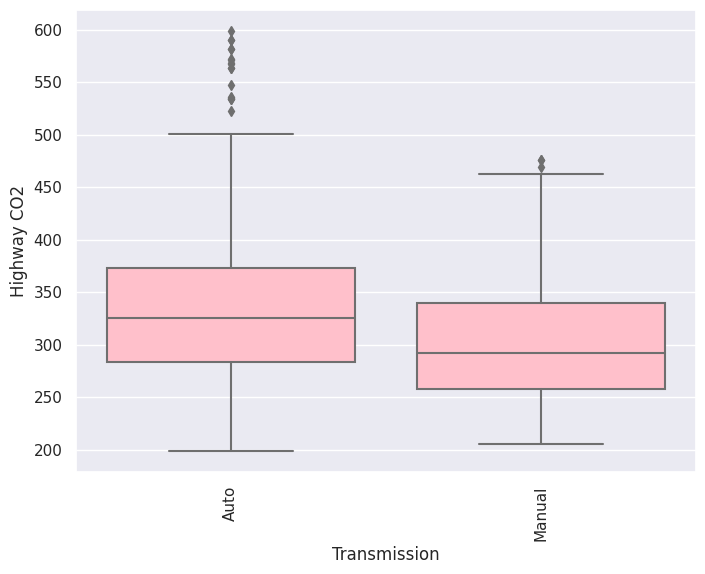

In [ ]:
# Plot the box plot
plt.figure(figsize=(8, 6))
plt.xticks(rotation=90)
sns.boxplot(data=data, x='Transmission', y='Highway CO2', color="skyblue", boxprops=dict(facecolor="pink"))

In [ ]:
Auto_outlier_highway= data['Highway CO2']>= 520
rows_AutoCo2_high= data[Auto_outlier_highway]

In [ ]:
rows_AutoCo2_high

,Model Year,Mfr Name,Division,Carline,Engine Displacement,# Cylinders,Transmission,City FE,Highway FE,Combined FE,Air Aspiration Method,Transmission Description,# Gears,Drive Desc,Carline Class Desc,Release Date,City CO2,Highway CO2,Combined CO2
21,2015,Volkswagen Group of,Bugatti,Veyron,8.0,16,Auto,8,15,10,Turbocharged,Automated Manual- Selectable (e.g. Automated M...,7,All Wheel Drive,Two Seaters,2014-05-23,1050,599,847
26,2015,Volkswagen Group of,Lamborghini,Aventador Roadster,6.5,12,Auto,10,16,12,Naturally Aspirated,Automated Manual- Selectable (e.g. Automated M...,7,All Wheel Drive,Two Seaters,2014-07-04,902,547,742
28,2015,Volkswagen Group of,Lamborghini,Veneno Roadster,6.5,12,Auto,11,17,13,Naturally Aspirated,Automated Manual- Selectable (e.g. Automated M...,7,All Wheel Drive,Two Seaters,2014-07-04,831,523,692
531,2015,General Motors,Chevrolet,G2500 EXPRESS CONV 2WD CARGOMDPV,6.0,8,Auto,10,15,12,Naturally Aspirated,Automatic,6,"2-Wheel Drive, Rear","Vans, Cargo Types",2014-07-21,875,590,747
532,2015,General Motors,Chevrolet,G2500 EXPRESS CONV 2WD CARGOMDPV,6.0,8,Auto,10,15,12,Naturally Aspirated,Automatic,6,"2-Wheel Drive, Rear","Vans, Cargo Types",2014-07-21,868,582,740
533,2015,General Motors,GMC,G2500 SAVANA CONV 2WD CARGO MDPV,6.0,8,Auto,10,15,12,Naturally Aspirated,Automatic,6,"2-Wheel Drive, Rear","Vans, Cargo Types",2014-07-21,875,590,747
534,2015,General Motors,GMC,G2500 SAVANA CONV 2WD CARGO MDPV,6.0,8,Auto,10,15,12,Naturally Aspirated,Automatic,6,"2-Wheel Drive, Rear","Vans, Cargo Types",2014-07-21,868,582,740
535,2015,General Motors,Chevrolet,G2500 EXPRESS 2WD PASS MDPV,4.8,8,Auto,11,17,13,Naturally Aspirated,Automatic,6,"2-Wheel Drive, Rear","Vans, Passenger Type",2014-07-21,791,534,675
536,2015,General Motors,Chevrolet,G2500 EXPRESS 2WD PASS MDPV,6.0,8,Auto,11,16,13,Naturally Aspirated,Automatic,6,"2-Wheel Drive, Rear","Vans, Passenger Type",2014-07-21,830,564,710
538,2015,General Motors,Chevrolet,G3500 EXPRESS 2WD PASS MDPV,4.8,8,Auto,11,17,13,Naturally Aspirated,Automatic,6,"2-Wheel Drive, Rear","Vans, Passenger Type",2014-07-21,794,536,678


Note: All the data filtered in this outliers were noticed to be General Motors

In [ ]:
ManCo2_1_high= data['Highway CO2']>= 465
ManCo2_2_high = data['Transmission'] =='Manual'
rows_ManCo2_high= ManCo2_1_high & ManCo2_2_high

In [ ]:
matching_row_Man_Co2_high= data[rows_ManCo2_high]
matching_row_Man_Co2_high

,Model Year,Mfr Name,Division,Carline,Engine Displacement,# Cylinders,Transmission,City FE,Highway FE,Combined FE,Air Aspiration Method,Transmission Description,# Gears,Drive Desc,Carline Class Desc,Release Date,City CO2,Highway CO2,Combined CO2
231,2015,General Motors,Chevrolet,CAMARO,6.2,8,Manual,14,19,16,Supercharged,Manual,6,"2-Wheel Drive, Rear",Compact Cars,2014-06-30,628,469,557
232,2015,General Motors,Chevrolet,CAMARO,6.2,8,Manual,14,19,16,Supercharged,Manual,6,"2-Wheel Drive, Rear",Compact Cars,2014-06-30,635,476,564
350,2015,General Motors,Cadillac,CTS,6.2,8,Manual,14,19,16,Supercharged,Manual,6,"2-Wheel Drive, Rear",Midsize Cars,2014-06-06,635,476,564


Note: The cars from these filters are also froma particular group of cars the General Motors

<Axes: xlabel='Transmission', ylabel='City CO2'>

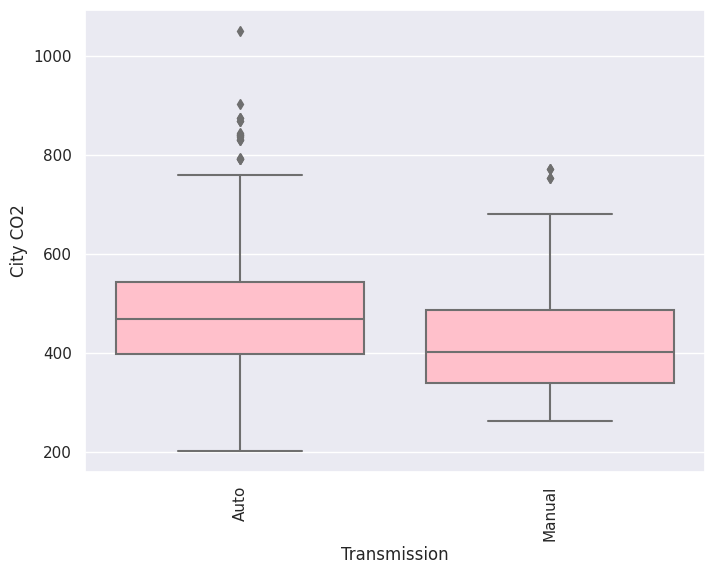

In [ ]:
# Plot the box plot
plt.figure(figsize=(8, 6))
plt.xticks(rotation=90)
sns.boxplot(data=data, x='Transmission', y='City CO2', color="skyblue", boxprops=dict(facecolor="pink"))

In [ ]:
Auto_outlier_city= data['City CO2']>= 750
rows_AutoCo2_city= data[Auto_outlier_city]

In [ ]:
rows_AutoCo2_city

,Model Year,Mfr Name,Division,Carline,Engine Displacement,# Cylinders,Transmission,City FE,Highway FE,Combined FE,Air Aspiration Method,Transmission Description,# Gears,Drive Desc,Carline Class Desc,Release Date,City CO2,Highway CO2,Combined CO2
8,2015,Volkswagen Group of,Audi,R8,4.2,8,Manual,11,20,14,Naturally Aspirated,Manual,6,All Wheel Drive,Two Seaters,2014-06-09,772,439,622
10,2015,Volkswagen Group of,Audi,R8,5.2,10,Manual,12,19,14,Naturally Aspirated,Manual,6,All Wheel Drive,Two Seaters,2014-06-09,753,454,618
12,2015,Volkswagen Group of,Audi,R8 Spyder,4.2,8,Manual,11,20,14,Naturally Aspirated,Manual,6,All Wheel Drive,Two Seaters,2014-06-09,772,439,622
14,2015,Volkswagen Group of,Audi,R8 Spyder,5.2,10,Manual,12,19,14,Naturally Aspirated,Manual,6,All Wheel Drive,Two Seaters,2014-06-09,753,454,618
21,2015,Volkswagen Group of,Bugatti,Veyron,8.0,16,Auto,8,15,10,Turbocharged,Automated Manual- Selectable (e.g. Automated M...,7,All Wheel Drive,Two Seaters,2014-05-23,1050,599,847
25,2015,Volkswagen Group of,Lamborghini,Aventador Coupe,6.5,12,Auto,11,18,13,Naturally Aspirated,Automated Manual- Selectable (e.g. Automated M...,7,All Wheel Drive,Two Seaters,2014-07-04,836,481,676
26,2015,Volkswagen Group of,Lamborghini,Aventador Roadster,6.5,12,Auto,10,16,12,Naturally Aspirated,Automated Manual- Selectable (e.g. Automated M...,7,All Wheel Drive,Two Seaters,2014-07-04,902,547,742
28,2015,Volkswagen Group of,Lamborghini,Veneno Roadster,6.5,12,Auto,11,17,13,Naturally Aspirated,Automated Manual- Selectable (e.g. Automated M...,7,All Wheel Drive,Two Seaters,2014-07-04,831,523,692
229,2015,General Motors,Chevrolet,CAMARO,6.2,8,Auto,12,18,14,Supercharged,Semi-Automatic,6,"2-Wheel Drive, Rear",Compact Cars,2014-06-30,760,499,643
331,2015,Volkswagen Group of,Bentley,Mulsanne,6.8,8,Auto,11,18,13,Turbocharged,Semi-Automatic,8,"2-Wheel Drive, Rear",Midsize Cars,2014-05-01,840,501,688


Notice that the Cars in this filtered date belongs to the company General Motors so this cant be considered as Outliers as it is particular to these set of data

In [ ]:
ManCo2_1_city= data['City CO2']>= 650
ManCo2_2_city = data['Transmission'] =='Manual'
rows_ManCo2_city= ManCo2_1_city & ManCo2_2_city

In [ ]:
matching_row_Man_Co2_city= data[rows_ManCo2_city]
matching_row_Man_Co2_city

,Model Year,Mfr Name,Division,Carline,Engine Displacement,# Cylinders,Transmission,City FE,Highway FE,Combined FE,Air Aspiration Method,Transmission Description,# Gears,Drive Desc,Carline Class Desc,Release Date,City CO2,Highway CO2,Combined CO2
2,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,4.7,8,Manual,13,19,15,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,681,461,582
4,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage S,4.7,8,Manual,13,19,15,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,681,461,582
6,2015,aston martin,Aston Martin Lagonda Ltd,Vantage GT,4.7,8,Manual,13,19,15,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Two Seaters,2014-05-19,681,461,582
8,2015,Volkswagen Group of,Audi,R8,4.2,8,Manual,11,20,14,Naturally Aspirated,Manual,6,All Wheel Drive,Two Seaters,2014-06-09,772,439,622
10,2015,Volkswagen Group of,Audi,R8,5.2,10,Manual,12,19,14,Naturally Aspirated,Manual,6,All Wheel Drive,Two Seaters,2014-06-09,753,454,618
12,2015,Volkswagen Group of,Audi,R8 Spyder,4.2,8,Manual,11,20,14,Naturally Aspirated,Manual,6,All Wheel Drive,Two Seaters,2014-06-09,772,439,622
14,2015,Volkswagen Group of,Audi,R8 Spyder,5.2,10,Manual,12,19,14,Naturally Aspirated,Manual,6,All Wheel Drive,Two Seaters,2014-06-09,753,454,618
233,2015,General Motors,Chevrolet,CAMARO,7.0,8,Manual,13,19,15,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Compact Cars,2014-06-15,680,463,582


**The filtered data shows the data in the outlier Manual and they belong to some particular group of cars hence they are not outliers**

<Axes: xlabel='Transmission', ylabel='Combined FE'>

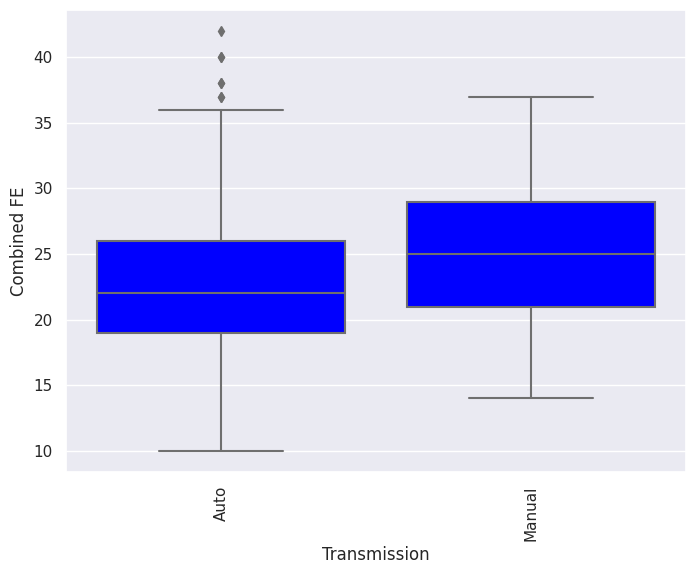

In [ ]:
# Plot the box plot
plt.figure(figsize=(8, 6))
plt.xticks(rotation=90)
sns.boxplot(data=data, x='Transmission', y='Combined FE', color="skyblue", boxprops=dict(facecolor="blue"))

In [ ]:
Auto_outlier_cityFE= data['Combined FE']>= 36
rows_Auto_cityFE= data[Auto_outlier_cityFE]

In [ ]:
rows_Auto_cityFE

,Model Year,Mfr Name,Division,Carline,Engine Displacement,# Cylinders,Transmission,City FE,Highway FE,Combined FE,Air Aspiration Method,Transmission Description,# Gears,Drive Desc,Carline Class Desc,Release Date,City CO2,Highway CO2,Combined CO2
40,2015,Mercedes-Benz,Mercedes-Benz,Smart fortwo (Convertible),1.0,3,Auto,34,38,36,Naturally Aspirated,Automated Manual,5,"2-Wheel Drive, Rear",Two Seaters,2014-06-03,256,228,244
41,2015,Mercedes-Benz,Mercedes-Benz,Smart fortwo (COUPE),1.0,3,Auto,34,38,36,Naturally Aspirated,Automated Manual,5,"2-Wheel Drive, Rear",Two Seaters,2014-06-03,256,228,244
115,2015,Volkswagen Group of,Audi,A3,2.0,4,Auto,31,43,36,Turbocharged,Automated Manual- Selectable (e.g. Automated M...,6,"2-Wheel Drive, Front",Subcompact Cars,2014-07-28,326,236,285
156,2015,Ford Motor Company,Ford,Fiesta SFE FWD,1.0,4,Manual,31,43,36,Turbocharged,Manual,5,"2-Wheel Drive, Front",Subcompact Cars,2014-06-20,280,206,247
282,2015,Mitsubishi Motors Co,Mitsubishi Motors Corporation,MIRAGE,1.2,3,Auto,37,44,40,Naturally Aspirated,Continuously Variable,1,"2-Wheel Drive, Front",Compact Cars,2014-06-01,241,199,222
283,2015,Mitsubishi Motors Co,Mitsubishi Motors Corporation,MIRAGE,1.2,3,Manual,34,42,37,Naturally Aspirated,Manual,5,"2-Wheel Drive, Front",Compact Cars,2014-06-01,262,208,238
303,2015,Volkswagen Group of,Volkswagen,Golf,2.0,4,Auto,31,43,36,Turbocharged,Automated Manual- Selectable (e.g. Automated M...,6,"2-Wheel Drive, Front",Compact Cars,2014-07-28,326,236,285
304,2015,Volkswagen Group of,Volkswagen,Golf,2.0,4,Manual,31,45,36,Turbocharged,Manual,6,"2-Wheel Drive, Front",Compact Cars,2014-07-28,331,224,283
308,2015,Volkswagen Group of,Volkswagen,Jetta,2.0,4,Auto,31,45,36,Turbocharged,Automated Manual- Selectable (e.g. Automated M...,6,"2-Wheel Drive, Front",Compact Cars,2014-08-04,324,228,281
309,2015,Volkswagen Group of,Volkswagen,Jetta,2.0,4,Manual,31,46,36,Turbocharged,Manual,6,"2-Wheel Drive, Front",Compact Cars,2014-07-28,332,223,283


**The outliers detected in this group are related to Volkswagen, Mercedes, Mitsibushi, Hyundai, and Ford**

<Axes: xlabel='Mfr Name', ylabel='Combined FE'>

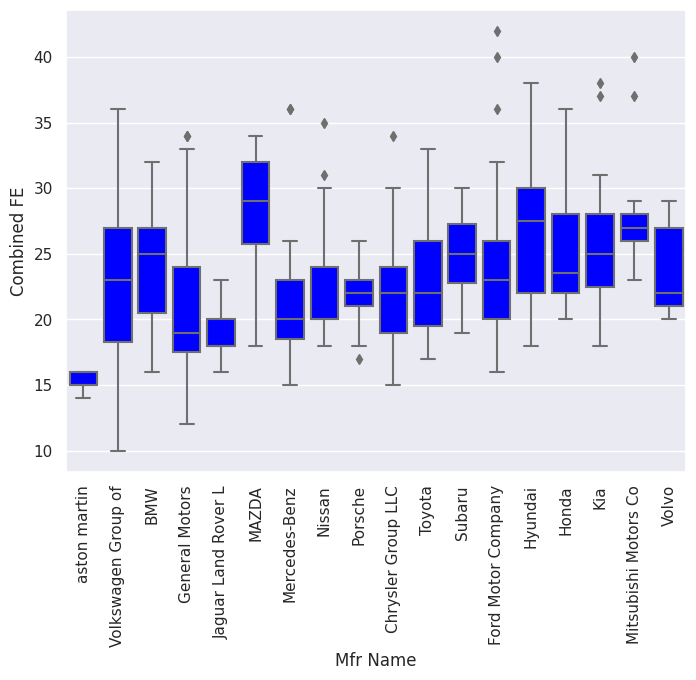

In [ ]:
#Plot the box plot
plt.figure(figsize=(8, 6))
plt.xticks(rotation=90)
sns.boxplot(data=data, x='Mfr Name', y='Combined FE', color="skyblue", boxprops=dict(facecolor="blue"))

In [ ]:
MfrComFE= data['Combined FE']>= 650
ManCo2_2_city = data['Mfr Name'] =='Manual'
rows_ManCo2_city= ManCo2_1_city & ManCo2_2_city

ALL OUTLIERS WERE CHECKED

**DATA ANALYSIS**

